## **IMPORTING REQUIRED MODULES**

In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,Flatten,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

## **READING & PRE-PROCESSSING THE IMAGES**

#### **Labels Assigned - With Mask = 1, Without Mask = 0**

In [15]:
def image_preproc(path,class_val):
    images=[]
    labels=[]
    for im in tqdm(glob.glob(path+'/*.*'),leave=True,position=0):
      img = cv2.imread(im)#,cv2.IMREAD_UNCHANGED) ## reading the image
      if img is not None:
        conv_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) ## converting RGB TO GRAYSCALE
        conv_img = cv2.resize(conv_img,(64,64)) ## resizing the image
        #print(conv_img.shape)
        conv_img = conv_img/255 ## Normalizing
        images.append(conv_img)
        labels.append(class_val)
      else:
        continue
    return images,labels

In [16]:
wm_img,wm_labels = image_preproc("/content/drive/MyDrive/My Summer Projects/Face_Mask_Detector/with_mask",1)

100%|██████████| 1916/1916 [08:10<00:00,  3.90it/s]


In [17]:
woutm_img,woutm_labels = image_preproc("/content/drive/MyDrive/My Summer Projects/Face_Mask_Detector/without_mask",0)

100%|██████████| 1918/1918 [15:49<00:00,  2.02it/s]


## **SAMPLE IMAGE OF PERSON HAVING MASK**

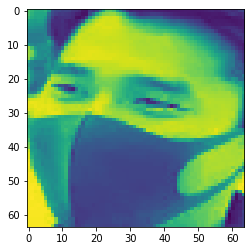

In [21]:
plt.imshow(wm_img[900])
plt.show()

## **SAMPLE IMAGE OF PERSON HAVING NO MASK**

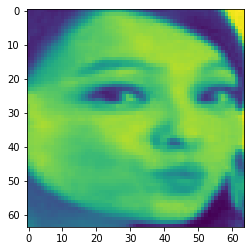

In [19]:
plt.imshow(woutm_img[20])
plt.show()

## **APPENDING THE DATA**

In [26]:
x_data = wm_img+woutm_img
y_data = wm_labels+woutm_labels
print("SHAPE OF X DATA::",np.array(x_data).shape)
print("SHAPE OF Y DATA::",np.array(y_data).shape)
#.shape

SHAPE OF X DATA:: (3833, 64, 64)
SHAPE OF Y DATA:: (3833,)


(3833, 64, 64, 1)

## **BUILDING THE ARCHITECTURE**

In [41]:
prec = keras.metrics.Precision()
recall = keras.metrics.Recall()
model  = Sequential()
model.add(Conv2D(32,3,strides=2,activation='relu',kernel_initializer='he_normal',input_shape=(64,64,1)))
model.add(Conv2D(32,3,strides=2,activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=[prec,recall,'accuracy'])
values=model.fit(np.expand_dims(np.array(x_data),axis=3),keras.utils.to_categorical(y_data,num_classes=2),batch_size=10,epochs=6,validation_split=0.1)

Epoch 1/6
345/345 [==============================] - 5s 12ms/step - loss: 0.6617 - precision_12: 0.5671 - recall_12: 0.5671 - accuracy: 0.5671 - val_loss: 0.5613 - val_precision_12: 0.8568 - val_recall_12: 0.8568 - val_accuracy: 0.8568
Epoch 2/6
345/345 [==============================] - 4s 11ms/step - loss: 0.4466 - precision_12: 0.7951 - recall_12: 0.7951 - accuracy: 0.7951 - val_loss: 0.4086 - val_precision_12: 0.8255 - val_recall_12: 0.8255 - val_accuracy: 0.8255
Epoch 3/6
345/345 [==============================] - 4s 11ms/step - loss: 0.2887 - precision_12: 0.8777 - recall_12: 0.8777 - accuracy: 0.8777 - val_loss: 0.4906 - val_precision_12: 0.7682 - val_recall_12: 0.7682 - val_accuracy: 0.7682
Epoch 4/6
345/345 [==============================] - 4s 11ms/step - loss: 0.2286 - precision_12: 0.9115 - recall_12: 0.9115 - accuracy: 0.9115 - val_loss: 0.3975 - val_precision_12: 0.8229 - val_recall_12: 0.8229 - val_accuracy: 0.8229
Epoch 5/6
345/345 [==============================] - 4s 

## **THE PLOTS**

#### **TRAINING ACCURACY AND VALIDATION ACCURACY V/S EPOCHS**

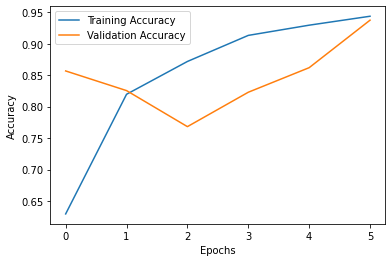

In [42]:
plt.plot(values.history['accuracy'],label="Training Accuracy")
plt.plot(values.history['val_accuracy'],label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### **TRAINING LOSS AND VALIDATION LOSS V/S EPOCHS**

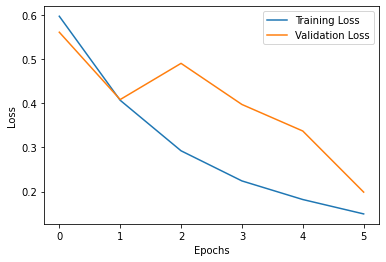

In [43]:
plt.plot(values.history['loss'],label = "Training Loss")
plt.plot(values.history['val_loss'],label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## **SAVING THE FACE CLASSIFIER MODEL**

In [45]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 31, 31, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                50208     
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 66        
Total params: 59,842
Trainable params: 59,842
Non-trainable params: 0
_________________________________________________

In [46]:
model.save('/content/drive/MyDrive/My Summer Projects/Face_Mask_Detector/face_mask_classifier.h5')